In [2]:
import sys, os
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
import pydub
import torch
from torchvision.datasets import MNIST
from torchvision import transforms
import torch.nn as nn
from datasets import *
from loading import load_model
#import torchaudio
#from torchaudio import transforms
import h5py as hf

/home/fleeb/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
model = load_model('trained_nets/crnn-9000-final_18-12-04-202356/best.pth.tar')

Loaded trained_nets/crnn-9000-final_18-12-04-202356/best.pth.tar
Saved params loaded


In [4]:
print(model)

Conv_RNN(
  (conv): Sequential(
    (0): Conv1d(1, 256, kernel_size=(2205,), stride=(2205,))
    (1): PReLU(num_parameters=1)
  )
  (rec): RecNet(
    (rec): GRU(256, 256, num_layers=2, batch_first=True)
    (out_layer): Linear(in_features=256, out_features=14, bias=True)
  )
)


In [6]:
weights = model.conv[0].weight.clone().detach().cpu()
weights.size()

torch.Size([256, 1, 2205])

In [18]:
i = 0
N = 10

<IPython.core.display.Javascript object>


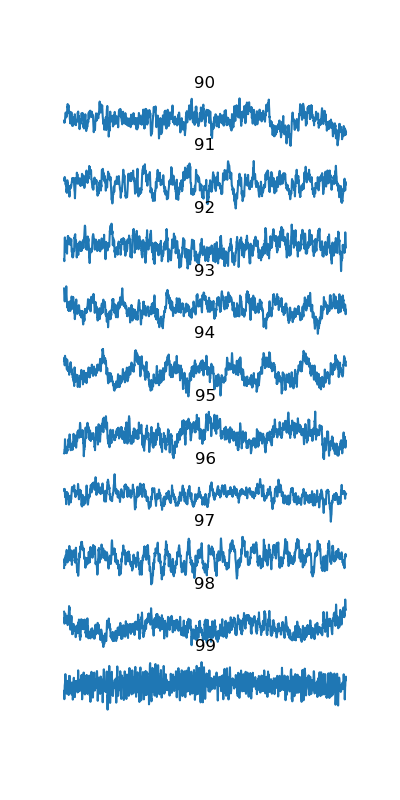

In [54]:
fig, axes = plt.subplots(N, figsize=(4,8))
for j, (ax, w) in enumerate(zip(axes.flat, weights[i:].squeeze())):
    ax.plot(w.numpy())
    ax.set_title(str(i+j))
    ax.axis('off')
#fig.tight_layout()
i += N

In [55]:
good_ones = [2, 63, 81, 
             55, 38, 30, 
             50, 14, 27, 
             #21,  69, 52,
            ]
M = min(12, len(good_ones)) #len(good_ones) - 1

<IPython.core.display.Javascript object>


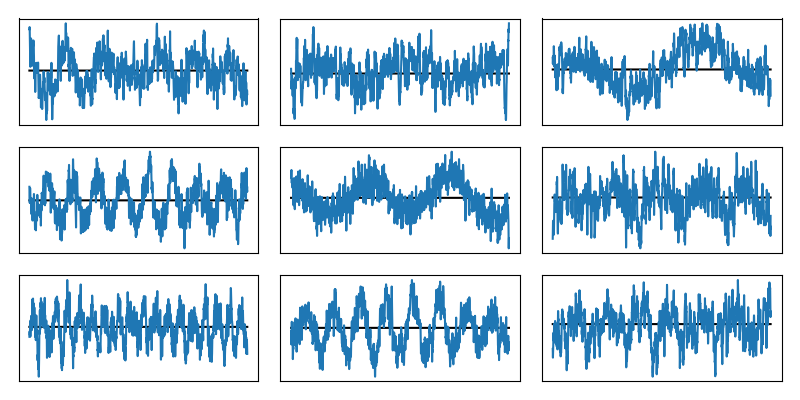

In [61]:
fig, axes = plt.subplots(3, 3, figsize=(8,4))
for j, (ax, w) in enumerate(zip(axes.flat, weights[good_ones].squeeze())):
    ax.plot(np.zeros(w.shape[0]), c='k')
    ax.plot(w.numpy())
    
    #ax.set_title(str(i+j))
    ax.set_xticks([])
    ax.set_yticks([])
    #ax.axis('off')
fig.tight_layout()

In [62]:
#fig.savefig('results/weights.png')
#fig.savefig('results/weights.pdf')